<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2024/2025

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 3: *Data Preparation & Dimensionality Reduction***

###**Tenggat Waktu: 23 Februari 2025 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab1_1806205773_Abdurrafi Arief.ipynb. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 23 Februari 2025, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam (pembulatan ke atas). Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.
9. Mahasiswa wajib mencantumkan semua sumber yang menjadi referensi jawaban, termasuk GPT.

## **Pernyataan Integritas**

In [1]:
# Isi dengan data diri Anda
NAMA = "Khansa Mahira"
KELAS = "C"
NPM = "2206819413"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
        "Gemini",
        "ChatGPT",
        "Perplexity AI",
        "https://www.oracle.com/id/data-duplication/",
        "https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/"
    ]

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Khansa Mahira dari kelas C dengan NPM 2206819413, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Khansa Mahira)


# Data Preprocessing

Data prepropessing merupakan proses membersihkan dan mentransformasi pada data mentah sebelum digunakan untuk menganalisis data atau untuk menge-train suatu machine learning. Fungsi dari data preprocessing adalah agar data-data yang akan dipakai sudah dipastikan berkualitas agar analisis atau machine learning yang dihasilkan memiliki hasil yang baik.


## Deskripsi Dataset

Dataset ini berisikan data mengenai kualitas suatu wine, dengan beberapa karakteristik dari wine tersebut. Dataset ini diambil dari : https://archive.ics.uci.edu/dataset/186/wine+quality. Berikut merupakan metadata dari setiap atributnya :

**Fixed Acidity:** Most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

**Volatile Acidity:** The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

**Citric Acid:** Dound in small quantities, citric acid can add 'freshness' and flavor to wines.

**Residual Sugar:** The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

**Chlorides:** The amount of salt in the wine.

**Free Sulfur Oxide:** The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

**Total Sulfur Oxide:** Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

**Density:** The density of water is close to that of water depending on the percent alcohol and sugar content.

**pH:** Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

**Sulphates:** A wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.

**Alcohol:** The percent alcohol content of the wine.

**Quality:** Output variable (based on sensory data, score between 0 and 10).

In [3]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler

In [4]:
# Import dataset
df = pd.read_csv('winequality-red.csv')

In [5]:
# KODE INI JANGAN DIGANTI
def manipulate_dataframe(df, remove_frac=0.2, duplicate_frac=0.2, random_state=None):
    np.random.seed(random_state)

    df_masked = df.copy()
    for col in df.columns:
        mask = np.random.rand(df.shape[0]) < remove_frac
        df_masked.loc[mask, col] = np.nan

    num_rows_to_duplicate = int(duplicate_frac * df.shape[0])
    rows_to_duplicate = df_masked.sample(n=num_rows_to_duplicate, random_state=random_state)
    df_augmented = pd.concat([df_masked, rows_to_duplicate], ignore_index=True)

    return df_augmented

In [6]:
# KODE INI JANGAN DIGANTI
df = manipulate_dataframe(df, remove_frac=0.05, duplicate_frac=0.2, random_state=int(NPM))
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1913,6.2,0.700,0.15,5.1,0.076,13.0,27.0,0.99622,3.54,0.60,11.9,6.0
1914,7.7,0.715,0.01,2.1,0.064,31.0,43.0,0.99371,NaN,0.57,11.8,6.0
1915,8.8,0.400,NaN,2.2,0.079,19.0,52.0,0.99800,3.44,0.64,9.2,5.0
1916,NaN,0.430,0.17,1.8,0.082,27.0,51.0,NaN,3.49,0.64,10.4,5.0


In [7]:
total_rows, total_attributes = df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

df.head()

Jumlah data: 1918
Jumlah atribut: 12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1825 non-null   float64
 1   volatile acidity      1821 non-null   float64
 2   citric acid           1825 non-null   float64
 3   residual sugar        1811 non-null   float64
 4   chlorides             1824 non-null   float64
 5   free sulfur dioxide   1829 non-null   float64
 6   total sulfur dioxide  1804 non-null   float64
 7   density               1828 non-null   float64
 8   pH                    1812 non-null   float64
 9   sulphates             1831 non-null   float64
 10  alcohol               1828 non-null   float64
 11  quality               1812 non-null   float64
dtypes: float64(12)
memory usage: 179.9 KB


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1825.000000,1821.000000,1825.000000,1811.000000,1824.000000,1829.000000,1804.000000,1828.000000,1812.000000,1831.000000,1828.000000,1812.000000
mean,8.343397,0.526796,0.273244,2.571452,0.088370,15.909787,46.149667,0.996785,3.307975,0.658236,10.435421,5.645695
std,1.772389,0.178024,0.195430,1.504609,0.048788,10.567308,32.504917,0.001937,0.156166,0.165184,1.077220,0.808751
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.100000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,37.000000,0.996800,3.310000,0.620000,10.200000,6.000000
75%,9.300000,0.640000,0.430000,2.600000,0.091000,21.000000,62.250000,0.997900,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

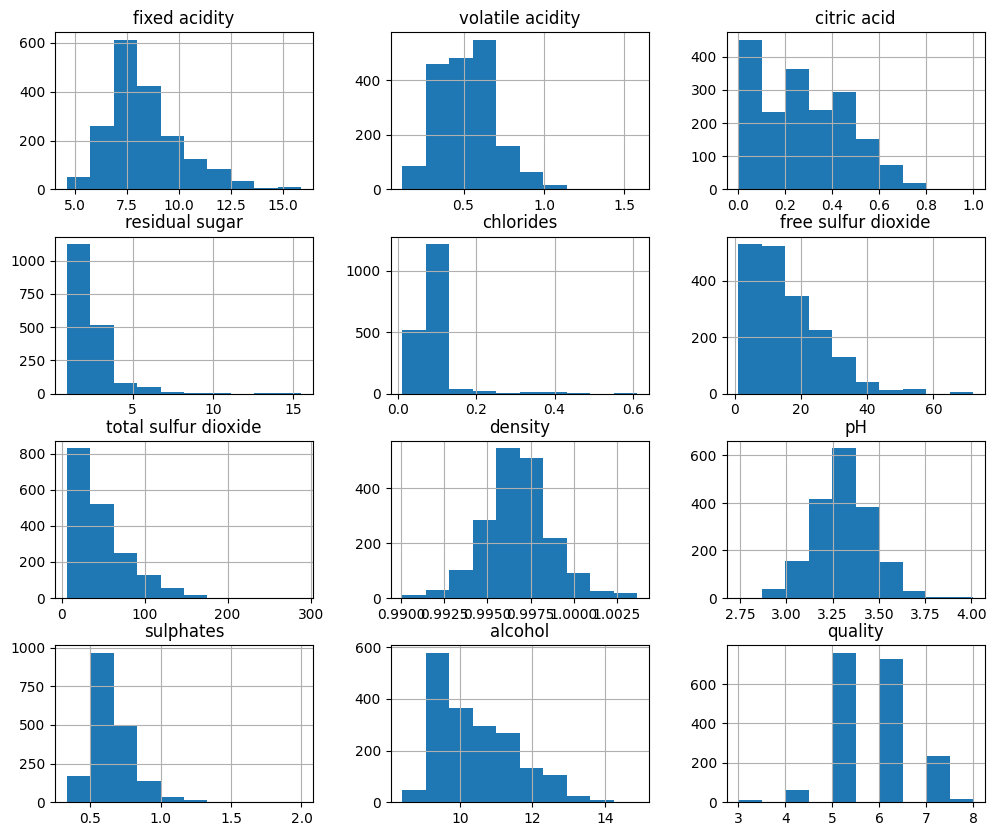

In [10]:
df.hist(figsize=(12,10))

Visualisasi di atas merupakan karakteristik dari data yang dipunya yang informasi tersebut dapat digunakan dalam preprocessing. Prerocessing yang akan dilakukan adalah : Menangani duplikasi data, outlier, dan missing value.

Setelah mengetahui deskripsi dataset yang akan digunakan, kita akan memulai proses *data pre-processing*. Pada pengerjaan lab ini, pre-processing yang akan kita lakukan adalah: penanganan duplikasi data, penanganan outlier, dan penanganan missing value.

## Penanganan Duplikasi Data

**Soal 1** : Cek apakah terdapat data duplikat, dan berapa jumlahnya

In [11]:
# 1 Jawab di sini
df.duplicated().sum()

405

**Soal 2** : Tangani data duplikat jika ada

In [12]:
# 2 Jawab di sini
df.drop_duplicates(inplace=True)

**Soal 3** : Mengapa data duplikat perlu ditangani?

3 Jawab disini

Penjelasan:

Data duplikat perlu ditangani karena akan berakibat sebagai berikut.
- Meningkatkan biaya penyimpanan karena data duplikat memakan lebih banyak ruang penyimpanan.
- Menurunkan akurasi analisis dan visualisasi sehingga metrik menjadi tidak konsisten.
- Memengaruhi pengambilan keputusan karena hasil analisis tidak akurat.
- Mengurangi efisiensi kerja karena memerlukan waktu tambahan untuk pemeriksaan dan perbaikan data.
(Sumber: https://www.oracle.com/id/data-duplication/)

## Penanganan Outlier

Outlier merupakan data yang abnormal dari data-data yang lain. Outlier ini memiliki nilai yang sangat kecil atau sangat besar dibandingkan data-data yang lain.

### Deteksi Outlier

**Soal 4** : Salah satu cara untuk mendeteksi outlier adalah dengan menggunakan boxplot, gunakan boxplot untuk mendeteksi outlier pada semua atribut yang ada!

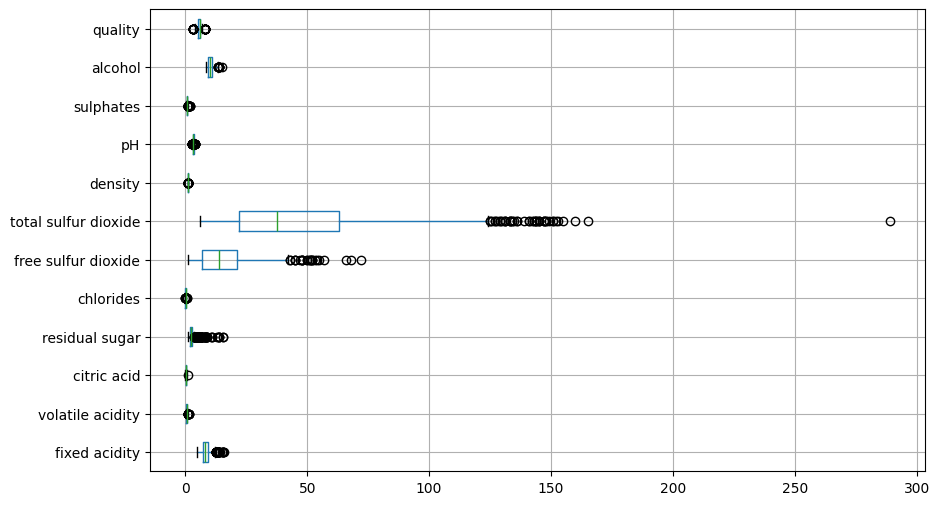

In [13]:
# 4 Jawab di sini
plt.figure(figsize=(10, 6))
boxplot = df.boxplot(figsize=(12,10), vert=False)
plt.show()

In [14]:
# Untuk melihat lebih jelas boxplot
# dari attribute selain total sulfur dioxide dan free sulfur dioxide

df_without_total_and_free_SO2 = df.copy()
df_without_total_and_free_SO2 = df_without_total_and_free_SO2.drop(['total sulfur dioxide', 'free sulfur dioxide'], axis=1)

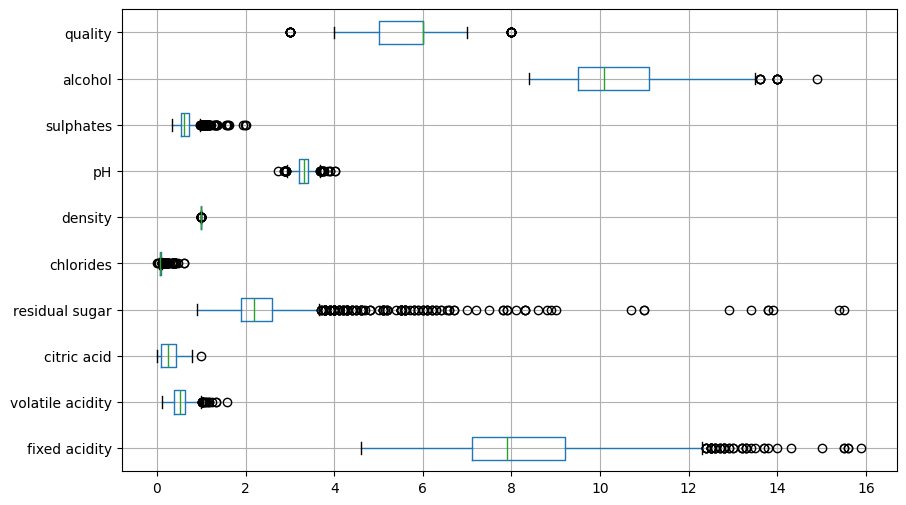

In [15]:
plt.figure(figsize=(10, 6))
boxplot = df_without_total_and_free_SO2.boxplot(figsize=(12,10), vert=False)
plt.show()

**Soal 5** : Ada berapa banyak outlier pada setiap atribut (menggunakan metode IQR)?

In [16]:
# 5 Jawab di sini
def count_outlier_iqr(df):
  outlier_counts = {}

  for column in df.select_dtypes(include=np.number):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_counts[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

  return pd.Series(outlier_counts)

In [17]:
outlier_counts = count_outlier_iqr(df)
print("Berikut jumlah outliers pada masing-masing attribute.")
print(outlier_counts)

Berikut jumlah outliers pada masing-masing attribute.
fixed acidity            46
volatile acidity         18
citric acid               1
residual sugar          133
chlorides                85
free sulfur dioxide      25
total sulfur dioxide     46
density                  40
pH                       31
sulphates                57
alcohol                  11
quality                  25
dtype: int64


### Menangani Outlier

Penanganan data outlier dapat dilakukan dengan cara-cara berikut :
- Jika outlier tidak terlalu banyak, maka dapat didrop datanya
- Jika model machine learning yang digunakan tidak sensitif oleh outlier, maka outlier tidak perlu ditangani
- Jika outlier yang didapatkan dari IQR merupakan data yang wajar berdasarkan domain data, maka outlier tidak perlu ditangani (kecuali outlier tersebut membuat machine learning anda lebih buruk)
- Jika outlier disebabkan oleh alat observasi yang rusak, maka data outlier tersebut dapat diganti dengan data yang baru dengan alat observasi yang sudah diperbaiki.
- Anda dapat menggunakan log transformation untuk distribusi yang skewed
- Anda dapat mengganti nilai outlier dengan mean atau median
- Anda dapat mengganti nilai outlier dengan upper bound atau lower bound
- Anda dapat menggunakan domain knowledge untuk mengetahui apa nilai yang hilang tersebut
- Jika nilai yang hilang dikarenakan oleh kesalahan alat observasi, maka alat observasi tersebut dapat diperbaiki dan dilakukan observasi ulang.

**Soal 6** : Tangani outlier dan jelaskan mengapa anda menggunakan cara tersebut untuk menangani outlier-nya!

In [18]:
# 6 Jawab di sini

def replace_extremes(df, column_name, extreme_type, distribution_type):
  """
  Fungsi ini digunakan untuk mengganti nilai outliers dengan
  nilai maksimum atau minimum berdasarkan distribusi yang dimiliki.
  """

  if extreme_type == 'max':
    extreme_value = df[column_name].max()
  elif extreme_type == 'min':
    extreme_value = df[column_name].min()
  else:
    raise ValueError("Invalid extreme_type. Choose 'max' or 'min'.")

  if distribution_type == 'normal':
    replacement_value = df[column_name].mean()
  elif distribution_type == 'skewed':
    replacement_value = df[column_name].median()
  else:
    raise ValueError("Invalid distribution_type. Choose 'normal' or 'skewed'.")

  df[column_name].replace(extreme_value, replacement_value, inplace=True)

In [19]:
# Menangani outlier pada attribute fixed acidity
while df['fixed acidity'].max() > 14.0:
    replace_extremes(df, 'fixed acidity', 'max', 'skewed')

<ipython-input-18-b84bb9c77869>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].replace(extreme_value, replacement_value, inplace=True)


In [20]:
# Menangani outlier pada attribute volatile acidity
replace_extremes(df, 'volatile acidity', 'max', 'skewed')

<ipython-input-18-b84bb9c77869>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].replace(extreme_value, replacement_value, inplace=True)


In [21]:
# Menangani outlier pada attribute citric acid
replace_extremes(df, 'citric acid', 'max', 'skewed')

<ipython-input-18-b84bb9c77869>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].replace(extreme_value, replacement_value, inplace=True)


In [22]:
# Menangani outlier pada attribute free sulfure dioxide
df.sort_values(by=['free sulfur dioxide'], ascending=False).head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1244,5.9,0.290,0.25,13.4,0.067,72.0,160.0,0.99721,3.33,0.54,10.3,6.0
396,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5.0
1558,6.9,0.630,NaN,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5.0
1131,5.9,0.190,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,NaN,5.0
1434,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6.0
584,11.8,0.330,0.49,3.4,0.093,54.0,NaN,1.00020,3.30,NaN,10.7,7.0
925,8.6,0.220,NaN,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0,7.0
1358,7.4,0.640,0.17,5.4,0.168,52.0,98.0,0.99736,3.28,0.50,9.5,5.0
926,9.4,0.240,0.33,2.3,0.061,52.0,73.0,0.99786,3.47,0.90,10.2,6.0
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5.0


In [23]:
for i in range(3):
    replace_extremes(df, 'free sulfur dioxide', 'max', 'skewed')

<ipython-input-18-b84bb9c77869>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].replace(extreme_value, replacement_value, inplace=True)


In [24]:
# Menangani outlier pada attribute total sulfure dioxide
df.sort_values(by=['total sulfur dioxide'], ascending=False).head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1081,NaN,0.300,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7.0
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,NaN
1244,5.9,0.290,0.25,13.4,0.067,14.0,160.0,0.99721,3.33,0.54,10.3,6.0
651,9.8,0.880,0.25,2.5,0.104,NaN,155.0,1.00100,3.41,0.67,11.2,5.0
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,NaN,3.21,0.69,NaN,5.0
684,9.8,0.980,0.32,2.3,0.078,35.0,152.0,NaN,3.25,0.48,9.4,5.0
515,8.5,0.655,0.49,6.1,0.122,34.0,151.0,1.00100,3.31,1.14,9.3,5.0
672,9.8,1.240,0.34,2.0,0.079,32.0,151.0,0.99800,NaN,0.53,NaN,5.0
591,6.6,0.390,0.49,1.7,0.070,23.0,149.0,0.99220,3.12,0.50,11.5,6.0
649,6.7,0.420,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.3,6.0


In [25]:
for i in range(3):
    replace_extremes(df, 'total sulfur dioxide', 'max', 'skewed')

<ipython-input-18-b84bb9c77869>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].replace(extreme_value, replacement_value, inplace=True)


In [26]:
# Menangani outlier pada attribute pH
while df['pH'].min() < 3.0:
    replace_extremes(df, 'pH', 'min', 'normal')

while df['pH'].max() > 4.0:
    replace_extremes(df, 'pH', 'max', 'normal')

<ipython-input-18-b84bb9c77869>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].replace(extreme_value, replacement_value, inplace=True)


Jawaban 6

Penjelasan:

Jumlah outliers pada df terlalu banyak untuk mendrop data outliers karena akan kehilangan banyak data. Sedangkan *cell code* yang telah dijalankan dari awal hingga nomor 6 belum memiliki model machine learning sehingga tidak dapat memutuskan untuk tidak menangani outliers. Tidak ada pemberitahuan bahwa alat observasi rusak sehingga diasumsikan bahwa alat observasi tidak rusak dan perlu menangani dengan langkah-langkah lain.

Oleh karena itu, saya memutuskan untuk melihat lebih detail boxplot untuk attributes selain `total sulfur dioxide` dan `free sulfur dioxide`.

Pada `fixed acidity` terdapat outliers dengan nilai lebih dari 14 sedangkan range pH bernilai 0-14, maka attribute ini perlu mengganti nilai outliers yang melebihi 14 dengan median berdasarkan positively skewed dari attribute.

`volatile acidity` memiliki beberapa outliers. Namun, berdasarkan pernyataan jika nilai attribute ini terlalu tinggi maka wine akan berasa tidak sedap atau seperti vinegar. Oleh karena itu, maka yang ditangani pada attribute ini hanyalah outlier terbesar yang diganti dengan nilai median berdasarkan positively skewed dari attribute.

Berdasarkan pernyataan `citric acid` akan menambahkan kesegaran pada wine maka nilai outlier yang dimiliki akan diganti dengan median sesuai dengan positively skewed dari attribute.

Nilai `residual sugar` yang jarang ditemukan adalah kurang dari 1 gram/liter atau lebih dari 45 gram/liter. Sedangkan outliers yang dimiliki attribute bernilai lebih dari 1 gram/liter dan kurang dari 45 gram/liter maka outliers tidak ditangani.

`chlorides` menjelaskan jumlah garam dalam wine yang mana outliers dari attribute ini tidak ekstrim sehingga outliers tidak ditangani.

`free sulfure dioxide` menjelaskan keseimbangan antara molekul S02 dan ion bisulfit untuk mencegah pertumbuhan mikroba dan oksidasi wine. Oleh karena itu, outliers yang ditangani hanya tiga terbesar dengan asumsi terdapat salah input yang diganti dengan nilai median berdasarkan right-skewed attribute.

`total sulfur dioxide` menjelaskan jumlah bentuk SO2 bebas dan terikat. Namun, konsentrasi SO2 bebas lebih dari 50 ppm maka SO2 menjadi lebih terasa dalam aroma dan rasa wine. Oleh karena itu, outlier yang ditangani hanya tiga terbesar dengan asumsi terdapat salah input yang diganti dengan nilai median berdasarkan right-skewed attribute.

`density` menjelaskan kerapatan cairan yang tergantung pada persentase alkohol dan kandungan gula. Oleh karena itu, outliers attribute ini tidak ditangani.

`pH` yang dimiliki wine sebagian besar antara 3 sampai 4. Oleh karena itu, jika terdapat outliers dengan nilai kurang dari 3 dan lebih dari 4, maka outliers tersebut ditangani yang diganti dengan nilai mean berdasarkan distribusi normal yang dimiliki attribute.

`sulphates` merupakan bahan aditif dalam anggur yang berkontribusi terhadap kadar gas sulfur dioksida (SO2) sebagai antimikroba dan antioksidan. Oleh karena itu, outliers attribute ini tidak ditangani.

`alcohol` menjelaskan persentase kadar alkohol dalam wine sehingga outliers attribute ini tidak ditangani.

`quality` menjelaskan variabel keluaran berdasarkan data sensorik dengan nilainya antara 0 sampai 10. Berdasarkan box plot, tidak ada outliers dengan nilai kurang dari 0 atau lebih dari 10 sehingga outliers attribute ini tidak ditangani.

## Penanganan Missing Value

Missing value merupakan data yang tidak ada. Missing value perlu ditangani karena banyak model machine learning yang mengharuskan atribut-atribut tidak kosong dan juga data yang tidak ada dapat membuat analisis data lebih sulit dilakukan.

Terdapat beberapa cara untuk menangani missing value, berikut merupakan caranya :    
- Menge-drop datanya, hal ini dilakukan jika missing value tidak terlalu banyak.
- Mengisi data yang hilang, untuk data numerik dapat menggunakan median atau mean, mean digunakan untuk distribusi normal, median digunakan untuk distribusi skewed, untuk data kategorikal dapat menggunakan modus.



**Soal 7** : Tangani missing value dan jelaskan mengapa anda menggunakan cara tersebut untuk menangani missing value!

In [27]:
# 7 Jawab di sini

# Untuk mengetahui missing value dari masing-masing attribute
# maka melihat jumlah non-null yang berbeda dengan jumlah entries
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1513 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1435 non-null   float64
 1   volatile acidity      1432 non-null   float64
 2   citric acid           1437 non-null   float64
 3   residual sugar        1427 non-null   float64
 4   chlorides             1431 non-null   float64
 5   free sulfur dioxide   1442 non-null   float64
 6   total sulfur dioxide  1420 non-null   float64
 7   density               1437 non-null   float64
 8   pH                    1428 non-null   float64
 9   sulphates             1437 non-null   float64
 10  alcohol               1437 non-null   float64
 11  quality               1419 non-null   float64
dtypes: float64(12)
memory usage: 153.7 KB


In [28]:
def fill_null(df, column_name, distribution_type):
  """
  Fungsi ini digunakan untuk mengisi nilai null
  berdasarkan distribusi yang dimiliki.
  """

  if distribution_type == 'normal':
    replacement_value = df[column_name].mean()
  elif distribution_type == 'skewed':
    replacement_value = df[column_name].median()
  else:
    raise ValueError("Invalid distribution_type. Choose 'normal' or 'skewed'.")

  # Replace the incorrect line with this:
  df[column_name] = df[column_name].fillna(replacement_value)

In [29]:
# Mengisi nilai null pada fixed acidity
fill_null(df, 'fixed acidity', 'skewed')

In [30]:
# Mengisi nilai null pada volatile acidity
fill_null(df, 'volatile acidity', 'skewed')

In [31]:
# Mengisi nilai null pada citric acid
fill_null(df, 'citric acid', 'skewed')

In [32]:
# Mengisi nilai null pada residual sugar
fill_null(df, 'residual sugar', 'skewed')

In [33]:
# Mengisi nilai null pada chlorides
fill_null(df, 'chlorides', 'skewed')

In [34]:
# Mengisi nilai null pada free sulfur dioxide
fill_null(df, 'free sulfur dioxide', 'skewed')

In [35]:
# Mengisi nilai null pada total sulfur dioxide
fill_null(df, 'total sulfur dioxide', 'skewed')

In [36]:
# Mengisi nilai null pada density
fill_null(df, 'density', 'normal')

In [37]:
# Mengisi nilai null pada pH
fill_null(df, 'pH', 'normal')

In [38]:
# Mengisi nilai null pada sulphates
fill_null(df, 'sulphates', 'skewed')

In [39]:
# Mengisi nilai null pada alcohol
fill_null(df, 'alcohol', 'skewed')

In [40]:
# Mengisi nilai null pada quality

# Mengkalkulasi probabilitas dari setiap unique value di 'quality'
quality_probs = df['quality'].value_counts(normalize=True)

# Function untuk mengisi null values berdasarkan probabilitas
def impute_quality(value):
    if pd.isnull(value):
        return np.random.choice(quality_probs.index, p=quality_probs.values)
    else:
        return value

# Mengaplikasikan function impute_quality ke attribute quality
df['quality'] = df['quality'].apply(impute_quality)

Berdasarkan jumlah non-null pada masing-masing attribute lebih kecil dari jumlah entries, maka nilai null tersebut diisi.

Pada attribute `fixed acidity`, nilai null diisi dengan nilai median berdasarkan positively skewed atau right-skewed attribute.

Pada attribute `volatile acidity`, nilai null diisi dengan nilai median berdasarkan positively skewed attribute.

Pada attribute `citric acid`, nilai null diisi dengan nilai median berdasarkan positively skewed attribute.

Pada attribute `residual sugar`, nilai null diisi dengan nilai median berdasarkan positively skewed attribute.

Pada attribute `chlorides`, nilai null diisi dengan nilai median berdasarkan positively skewed attribute.

Pada attribute `free sulfur dioxide`, nilai null diisi dengan nilai median berdasarkan positively skewed attribute.

Pada attribute `total sulfur dioxide`, nilai null diisi dengan nilai median berdasarkan positively skewed attribute.

Pada attribute `density`, nilai null diisi dengan nilai mean berdasarkan distribusi normal attribute.

Pada attribute `pH`, nilai null diisi dengan nilai mean berdasarkan distribusi normal attribute.

Pada attribute `sulphates`, nilai null diisi dengan nilai median berdasarkan positively skewed attribute.

Pada attribute `alcohol`, nilai null diisi dengan nilai median berdasarkan positively skewed attribute.

Pada attribute `quality`, nilai null diisi dengan nilai random berdasarkan probabilitas kemunculan setiap nilai unik pada attribute ini.

# Dimensionality Reduction with Principal Component Analysis (PCA)

Pada analisis data dan *machine learning*, terdapat tahapan *dimensionality reduction*, yang sesuai namanya, mengacu pada teknik untuk mengurangi dimensi data namun berusaha untuk **memaksimalkan** informasi yang dapat dipertahankan.

Teknik dimensionality reduction terbagi menjadi dua kategori besar:
1. Feature Selection: mencari sekelompok fitur-fitur yang paling relevan untuk prediksi.
2. Feature Extraction: melakukan pemetaan suatu atribut menjadi atribut lain untuk mengurangi dimensi. Contohnya:
    * Principal Component Analysis (PCA)
    * Singular Value Decomposition (SVD)
    * Linear Discriminant Analysis (LDA)

## Principal Component Analysis (PCA)

PCA nerupakan salah satu teknik *dimensionality reduction* yang dilakukan untuk mentransformasikan data **numerik** dengan dimensi tinggi ke dimensi yang lebih rendah (mengurangi kompleksitas fitur). Cara kerjanya adalah mengindentifikasi vektor-vektor ortogonal yang disebut sebagai *principal components* yang mencoba menangkap variansi secara maksimal. *Principal components* pertama menangkap variansi terbesar pada data, *principal components* kedua menangkap variansi maximum yang *orthogonal* dari *principal components* pertama, dan seterusnya. Variansi data dapat ditangkap secara sempurna ketika jumlah *principal components* = jumlah dimensi. **Namun,** pada sebagian besar kasus, terutama data dengan dimensi yang sangat besar, variansi data dapat ditangkap secara cukup menggunakan jumlah *principal components* yang relatif kecil. (Baca selengkapnya pada PPT PCA yang terdapat di scele).

## Tahapan PCA dengan library sklearn

In [41]:
from sklearn.decomposition import PCA

df = pd.read_csv('winequality-red.csv')

X = df.drop(columns=['quality'])
y = df['quality']

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [42]:
X_pca.shape

(1599, 11)

In [43]:
# explained variants
explained_variants = pca.explained_variance_ratio_
explained_variants

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
       0.05996439, 0.05307193, 0.03845061, 0.0313311 , 0.01648483,
       0.00541439])

## Tahapan PCA tanpa library sklearn (manual)

In [44]:
X_manual = df.drop(columns=['quality'])
y_manual = df['quality']

# Scaling data
scaler = StandardScaler()
scaler.fit(X_manual)

scaled_data = scaler.transform(X_manual)

# Covariance Matrix
features = scaled_data.T
cov_matrix = np.cov(features)

# Eigen decomposition
values, vectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(values)[::-1]

values = values[sorted_indices]
vectors = vectors[:, sorted_indices]

explained_variances = []

for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))

print(np.sum(explained_variances))
print(explained_variances)

1.0000000000000002
[0.28173931278817294, 0.17508269905476773, 0.1409584989795216, 0.11029386641621158, 0.08720837012236166, 0.05996438771540092, 0.05307192901751535, 0.038450609059816516, 0.031331101528977806, 0.016484833324355096, 0.005414391992899076]


Perhatikan bahwa nilai *explained variance* menggunakan library sklearn ataupun menggunakan PCA secara manual sama saja.

In [45]:
# Hitung cumulative explained variance ratio
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
explained_variance_ratio_cumulative

array([0.28173931, 0.45682201, 0.59778051, 0.70807438, 0.79528275,
       0.85524714, 0.90831906, 0.94676967, 0.97810077, 0.99458561,
       1.        ])

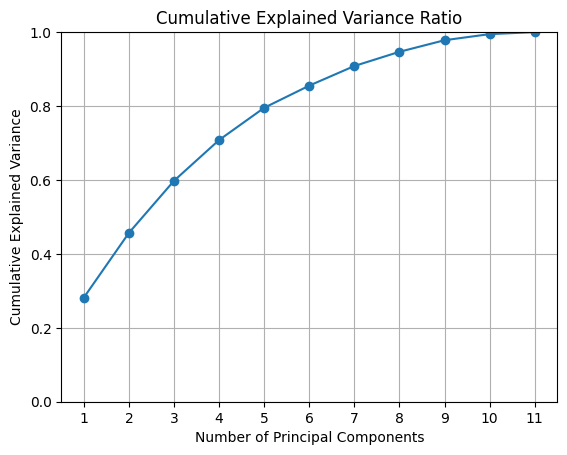

In [46]:
# Buat plot cumulative explained variance ratio
plt.plot(range(1, 12), explained_variance_ratio_cumulative, marker='o', linestyle='-')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.title('Cumulative Explained Variance Ratio')
plt.xticks(range(1, 12))
plt.ylim(0, 1)
plt.grid(True)
plt.show()

Dari plot di atas, terlihat bahwa 94% varians sudah dapat dijelaskan oleh 8 atribut (dari 11 atribut) saja menggunakan PCA. Selanjutnya mari kita visualisasikan data sebelum dan sesudah dilakukan PCA.

In [47]:
# Melakukan invers PCA n atribut (transformasi dari PCA ke fitur awal)
def inverse_pca(pca_data, pca, remove_n):
    transformed = pca_data.copy()
    transformed[:, -remove_n:] = 0
    return pca.inverse_transform(transformed)

LL = inverse_pca(X_pca, pca, 3)

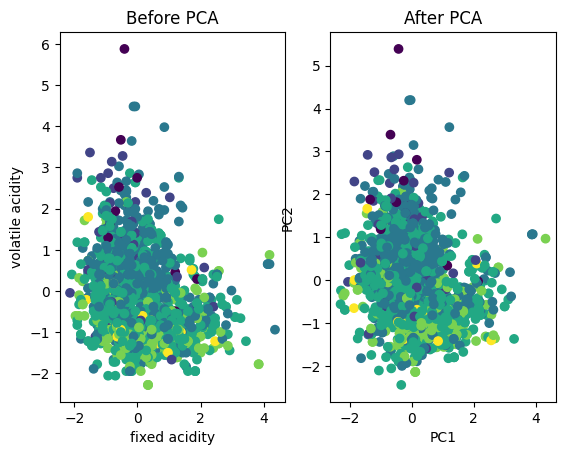

In [48]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=y, cmap='viridis')
axes[0].set_xlabel(X_manual.columns[0])
axes[0].set_ylabel(X_manual.columns[1])
axes[0].set_title('Before PCA')
axes[1].scatter(x=LL[:,0], y= LL[:,1],c=y, cmap='viridis')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

Berdasarkan visualisasi di atas, kita bisa melihat bahwa plot data sebelum dan sesudah PCA mirip. Di kiri adalah plot dari dua fitur `x1` dan `x2` di dataset asli sedangkan di kanan adalah plot hasil transformasi PCA. Hal ini karena kita dapat memaksimalisasi nilai explained variance terutama pada Principal Component 1 dan 2.

Kita dapat melihat bahwa perbandingan visualisasi data menggunakan atribut asli dengan visualisasi menggunakan PC1 (Principal Component 1) dan PC2 (Principal Component 2) menunjukkan visualisasi scatter plot yang cukup mirip. Hal ini karena PC1 dan PC2 "menangkap" variasi terbesar dari dataset

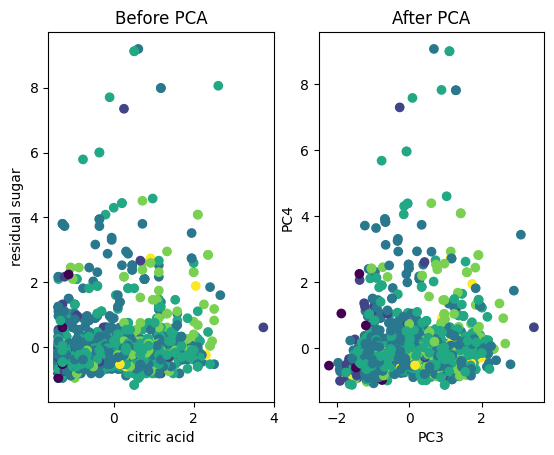

In [49]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(x=scaled_data[:,2], y=scaled_data[:,3], c=y, cmap='viridis')
axes[0].set_xlabel(X_manual.columns[2])
axes[0].set_ylabel(X_manual.columns[3])
axes[0].set_title('Before PCA')
axes[1].scatter(x=LL[:,2], y= LL[:,3],c=y, cmap='viridis')
axes[1].set_xlabel('PC3')
axes[1].set_ylabel('PC4')
axes[1].set_title('After PCA')
plt.show()

Sementara itu, ketika kita membandingkan visualisasi data asli dengan PC3 dan PC4, kita dapat melihat bahwa ada perbedaan yang lebih besar, misalnya kita lihat bentuk scatter plot untuk kelompok berwarna biru lebih menyebar pada visualisasi "After PCA" dibandingkan "Before PCA". Hal ini karena variasi data pada PC3 dan PC4 lebih kecil dibandingkan PC1 dan PC2

Selain menggunakan grafik dua dimensi (2D), kita juga dapat melakukan visualisasi PCA menggunakan grafik tiga dimensi (3D). Contohnya adalah sebagai berikut:

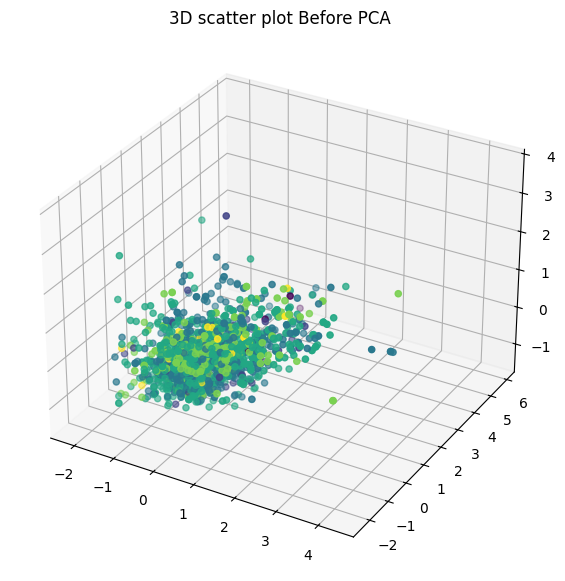

In [50]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter(scaled_data[:,0],scaled_data[:,1], scaled_data[:,2], c=y, cmap='viridis')
plt.title("3D scatter plot Before PCA")
plt.show()

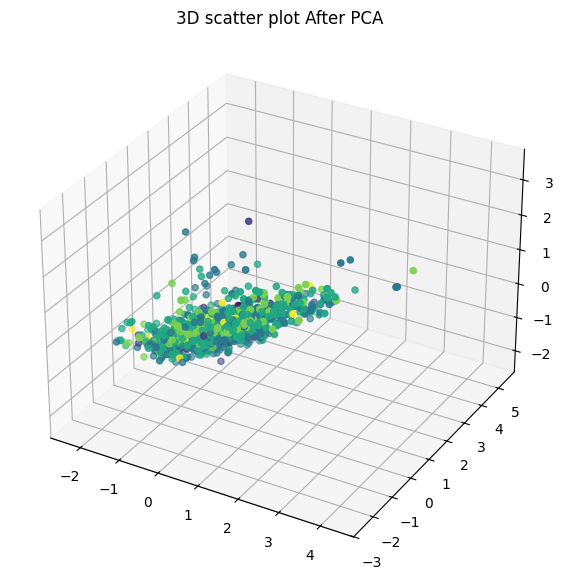

In [51]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter(LL[:,0],LL[:,1], LL[:,2], c=y, cmap='viridis')
plt.title("3D scatter plot After PCA")
plt.show()

Pada visualisasi di atas, kita melihat proyeksi tiga dimensi untuk scatter plot sebelum PCA (menggunakan data asli) dan setelah PCA (menggunakan PC1, PC2, PC3). Dapat kita lihat bahwa persebaran datanya mirip, namun masih terdapat beberapa perbedaan di antara keduanya, hal ini karena tiga principal component yang kita pilih tidak menangkap 100% variasi dataset.

Lebih lanjut, kita juga dapat melihat informasi dari mana nilai setiap fitur hasil PCA berasal pada *code cell* berikut. Dapat dilihat bahwa setiap PC merupakan kombinasi linear dari fitur-fitur semula. Sebagai contoh, PC1 dapat diperoleh dari `0.489314	* fixed acidity - 0.238584 * volatile acidity + 0.463632 * citric acid + 0.146107	* residual sugar + 0.212247 * chlorides - 0.036158 * free sulfur dioxide + 0.023575	* total sulfur dioxide + 0.395353 * density - 0.438520 * pH + 0.242921 * sulphates - 0.113232 * alcohol` dengan setiap koefisien menggambarkan kontribusi relatif dari setiap fitur terhadap PC1. Dengan begitu, kita dapat memilih untuk menghapus beberapa PC dengan *explained variance* terkecil tanpa kehilangan informasi yang signifikan.

In [52]:
pd.DataFrame(pca.components_, columns=X.columns, index=['PC' + str(i) for i in range (1, X.shape[1] + 1)])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
PC1,0.489314,-0.238584,0.463632,0.146107,0.212247,-0.036158,0.023575,0.395353,-0.438520,0.242921,-0.113232
PC2,-0.110503,0.274930,-0.151791,0.272080,0.148052,0.513567,0.569487,0.233575,0.006711,-0.037554,-0.386181
PC3,-0.123302,-0.449963,0.238247,0.101283,-0.092614,0.428793,0.322415,-0.338871,0.057697,0.279786,0.471673
PC4,-0.229617,0.078960,-0.079418,-0.372793,0.666195,-0.043538,-0.034577,-0.174500,-0.003788,0.550872,-0.122181
PC5,-0.082614,0.218735,-0.058573,0.732144,0.246501,-0.159152,-0.222465,0.157077,0.267530,0.225962,0.350681
PC6,-0.101479,-0.411449,-0.069593,-0.049156,-0.304339,0.014000,-0.136308,0.391152,0.522116,0.381263,-0.361645
PC7,0.350227,0.533735,-0.105497,-0.290663,-0.370413,0.116596,0.093662,0.170481,0.025138,0.447469,0.327651
PC8,0.177595,0.078775,0.377516,-0.299845,0.357009,0.204781,-0.019036,0.239223,0.561391,-0.374604,0.217626
PC9,0.194021,-0.129110,-0.381450,0.007523,0.111339,0.635405,-0.592116,0.020719,-0.167746,-0.058367,0.037603
PC10,-0.249523,0.365925,0.621677,0.092872,-0.217671,0.248483,-0.370750,-0.239990,-0.010970,0.112320,-0.303015


**Soal 8** : Lakukan PCA pada dataset [parkinson](https://www.kaggle.com/datasets/rohanpurohit03/parkinsons-disease-voice-and-clinical-data), tentukan berapa atribut yang digunakan dan jelaskan alasannya. Selanjutnya tampilkan visualisasi perbandingan dan berikan analisisnya dari 2 dimensi dengan explained variance tertinggi setelah mereduksi dimensi dengan PCA dengan sebelum dilakukan PCA.

In [53]:
# JANGAN UBAH KODE INI

from sklearn.decomposition import PCA

df = pd.read_csv('parkinson_final_cleaned.csv')

# Melihat shape dari dataframe
total_rows, total_attributes = df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

# Melihat nama atribut dalam dataframe
print("-----Berikut adalah daftar kolom/attribut dalam dataset-----")
print()
print(df.columns)

Jumlah data: 23841
Jumlah atribut: 30
-----Berikut adalah daftar kolom/attribut dalam dataset-----

Index(['recording_id', 'fundamental_freq_hz', 'max_freq_hz', 'min_freq_hz',
       'jitter_percent', 'jitter_abs', 'jitter_rap', 'jitter_ppq',
       'jitter_ddp', 'shimmer', 'shimmer_db', 'shimmer_apq3', 'shimmer_apq5',
       'shimmer_apq', 'shimmer_dda', 'nhr', 'hnr', 'parkinson_status', 'rpde',
       'dfa', 'spread_1', 'spread_2', 'detrended_fluctuation', 'ppe',
       'subject_id', 'age', 'gender', 'test_time', 'motor_updrs_score',
       'total_updrs_score'],
      dtype='object')


In [54]:
# JANGAN UBAH KODE INI

X = df.select_dtypes(include=['float64'])
y = df['parkinson_status']

X.shape

(23841, 25)

In [55]:
# 8 Jawab di sini
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [56]:
X_pca.shape

(23841, 25)

In [57]:
# explained variants
explained_variants = pca.explained_variance_ratio_
explained_variants

array([5.37895279e-01, 1.08481318e-01, 8.07123554e-02, 5.88289705e-02,
       4.56694949e-02, 3.85352242e-02, 3.70470686e-02, 2.53795600e-02,
       1.96276275e-02, 1.37730023e-02, 1.05489785e-02, 7.42885135e-03,
       5.21541328e-03, 3.66590111e-03, 2.37086705e-03, 1.42151267e-03,
       1.34791935e-03, 7.33045344e-04, 6.00325949e-04, 3.66095191e-04,
       2.12942788e-04, 9.93386573e-05, 3.88952654e-05, 1.18771399e-08,
       1.13483526e-09])

In [58]:
# PCA tanpa library sklearn (manual)
scaled_data = scaler.transform(X)

# Covariance Matrix
features = scaled_data.T
cov_matrix = np.cov(features)

# Eigen decomposition
values, vectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(values)[::-1]

values = values[sorted_indices]
vectors = vectors[:, sorted_indices]

explained_variances = []

for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))

print(np.sum(explained_variances))
print(explained_variances)

1.0
[0.5378952793774084, 0.10848131764470993, 0.08071235543335134, 0.05882897045387503, 0.04566949490828394, 0.038535224195304585, 0.037047068636146374, 0.025379559980244167, 0.019627627544739203, 0.013773002321043722, 0.010548978476644906, 0.007428851353962795, 0.005215413281691831, 0.0036659011102106675, 0.002370867049011143, 0.0014215126740587775, 0.0013479193524909704, 0.0007330453436550284, 0.0006003259489389185, 0.00036609519111696463, 0.0002129427884056713, 9.933865730269891e-05, 3.889526542777643e-05, 1.1877139878258e-08, 1.1348352489916459e-09]


In [59]:
# Menghitung cumulative explained variance ratio
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
explained_variance_ratio_cumulative

array([0.53789528, 0.6463766 , 0.72708895, 0.78591792, 0.83158742,
       0.87012264, 0.90716971, 0.93254927, 0.9521769 , 0.9659499 ,
       0.97649888, 0.98392773, 0.98914314, 0.99280904, 0.99517991,
       0.99660142, 0.99794934, 0.99868239, 0.99928272, 0.99964881,
       0.99986175, 0.99996109, 0.99999999, 1.        , 1.        ])

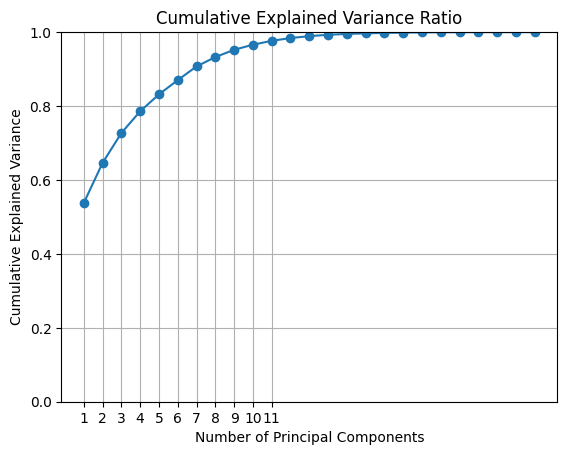

In [60]:
# Plot cumulative explained variance ratio
plt.plot(range(1, pca.n_components_+1), explained_variance_ratio_cumulative, marker='o', linestyle='-')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.title('Cumulative Explained Variance Ratio')
plt.xticks(range(1, 12))
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [61]:
# PCA
pca = PCA(n_components=0.95)  # Menjelaskan 95% variansi
X_pca = pca.fit_transform(X_scaled)

# Menampilkan jumlah principal component
print("Jumlah principal component:", pca.n_components_)

Jumlah principal component: 9


Pada dataset parkinson, jumlah atribut yang digunakan adalah 9 attributes dari 25 attributes. Hal ini dikarenakan 9 attributes menjelaskan 95% varians berdasarkan Cumulative Explained Variance Ratio plot.

In [62]:
# Melakukan invers PCA n atribut (transformasi dari PCA ke fitur awal)
def inverse_pca(pca_data, pca, remove_n):
    transformed = pca_data.copy()
    transformed[:, -remove_n:] = 0
    return pca.inverse_transform(transformed)

LL = inverse_pca(X_pca, pca, 3)

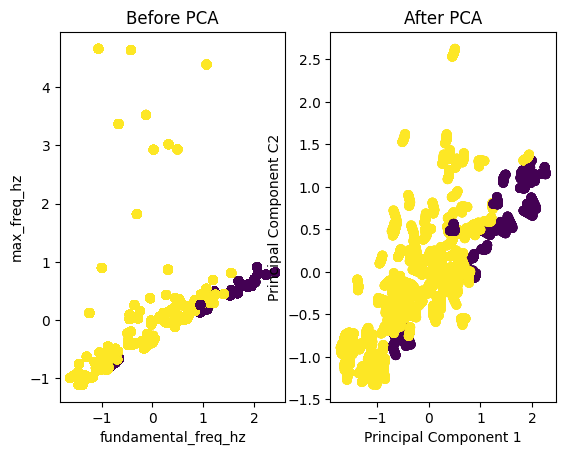

In [63]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=y, cmap='viridis')
axes[0].set_xlabel(X.columns[0])
axes[0].set_ylabel(X.columns[1])
axes[0].set_title('Before PCA')
axes[1].scatter(x=LL[:,0], y= LL[:,1],c=y, cmap='viridis')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component C2')
axes[1].set_title('After PCA')
plt.show()

Pada visualisasi tersebut terlihat scatter plot sebelum dan sesudah PCA berbeda. Pada gambar sebelah kiri yang menggunakan dua fitur dengan nilai explained variance tertinggi yaitu fundamental_freq_hz dan max_freq_hz merupakan dataset asli. Sedangkan gambar sebelah kanan merupakan transformasi PCA dengan memaksimalisasi nilai explained variance pada Principal Component 1 dan 2.

Perbedaan antara sebelum dan sesudah PCA adalah setelah PCA plot terlihat lebih berkumpul. Contohnya pada titik-titik data berwarna kuning yang sebelum PCA lebih tersebar tetapi setelah PCA terlihat lebih rapat. Hal ini dikarenakan mempertahankan komponen utama yang memiliki variance terbesar sehingga dapat memaksimalkan experienced variance dari data.

Lebih rinci, informasi nilai setiap fitur hasil PCA berasal pada code cell berikut. Setiap PC merupakan kombinasi linear dari fitur-fitur semua. Contoh PC1 merupakan hasil dari `-0.067999 * fundamental_freq_hz + 0.010852 * max_freq_hz - 0.066951 * min_freq_hz + 0.251275 * jitter_percent + 0.237573 * jitter_abs + 0.245600 * jitter_rap + 0.252979 * jitter_ppq + 0.245596 * jitter_ddp + 0.257533 * shimmer + 0.258841 * shimmer_db	+ ... - 0.240551 * hnr + 0.146277 * rpde + 0.048440 * dfa + 0.225597 * spread_1 + 0.153014 * spread_2 + 0.159258 * detrended_fluctuation + 0.232409 * ppe + 0.010062 * test_time + 0.080214 * motor_updrs_score + 0.078592 * total_updrs_score` dengan masing-masing koefisien menggambarkan kontribusi relatif dari setiap fitur terhadap PC1. Oleh karena itu, kita bisa memilih untuk menghilangkan beberapa PC dengan explained variance terendah tanpa kehilangan informasi yang berarti.

In [64]:
n_pcs= pca.components_.shape[0] # get number of components
pc_names = ['PC'+str(i) for i in range(1,n_pcs+1)]

# create the dataframe
pd.DataFrame(pca.components_, columns=X.columns, index=pc_names)

,fundamental_freq_hz,max_freq_hz,min_freq_hz,jitter_percent,jitter_abs,jitter_rap,jitter_ppq,jitter_ddp,shimmer,shimmer_db,...,hnr,rpde,dfa,spread_1,spread_2,detrended_fluctuation,ppe,test_time,motor_updrs_score,total_updrs_score
PC1,-0.067999,0.010852,-0.066951,0.251275,0.237573,0.245600,0.252979,0.245596,0.257533,0.258841,...,-0.240551,0.146277,0.048440,0.225597,0.153014,0.159258,0.232409,0.010062,0.080214,0.078592
PC2,0.525921,0.316581,0.404316,0.041074,-0.118393,0.067281,0.051688,0.067292,0.048822,0.074741,...,-0.019253,-0.252220,-0.254502,-0.190670,-0.133025,0.151477,-0.168240,0.048367,0.280793,0.294430
PC3,-0.086795,-0.179375,-0.143140,-0.187080,-0.200630,-0.215328,-0.136637,-0.215350,0.015375,0.001815,...,-0.063032,0.146881,0.067359,0.127391,0.279383,0.201689,0.099536,0.061998,0.514628,0.495034
PC4,-0.106701,-0.355202,0.245368,0.028787,0.035893,0.032442,0.106672,0.032450,0.086910,0.097721,...,0.110964,-0.314498,0.579052,-0.145186,-0.259274,-0.360428,-0.077402,0.053696,0.138076,0.162379
PC5,-0.143087,0.062145,-0.079391,0.221662,0.257829,0.223059,0.179418,0.223090,-0.240589,-0.188849,...,0.148443,-0.094464,-0.015014,0.136324,-0.001681,-0.066197,0.097328,0.421245,0.213720,0.261969
PC6,0.023187,-0.037531,-0.043563,-0.100126,-0.088443,-0.086042,-0.110229,-0.086060,0.110236,0.071758,...,-0.102107,0.162212,-0.097983,-0.095963,-0.110204,-0.057852,-0.096745,0.875930,-0.089929,-0.149684
PC7,0.061828,0.482964,0.082218,-0.023044,-0.082163,-0.084286,0.064385,-0.084311,-0.007953,0.033317,...,0.132131,-0.323830,0.464625,0.128780,0.401291,0.197940,0.201650,0.187975,-0.202726,-0.132117
PC8,0.171406,-0.478787,0.662520,0.026561,-0.003153,0.031378,0.036666,0.031396,-0.097676,-0.089975,...,-0.075693,0.233670,0.008492,0.106004,0.306395,0.148192,0.118354,0.077375,-0.145308,-0.123874
PC9,0.014194,-0.425691,-0.244059,0.010315,-0.001240,0.041171,-0.046057,0.041160,-0.003265,-0.017851,...,-0.003892,-0.513220,-0.042318,-0.018174,-0.161299,0.661358,-0.031765,0.059505,-0.096329,-0.085558


**Soal 9** : Kapan PCA perlu dilakukan? Apa step yang penting untuk dilakukan sebelum melakukan PCA secara manual maupun dengan library sklearn secara langsung dan apa alasannya?

**Hint**: Perhatikan persamaan preprocessing kedua tahap tersebut

9 Jawab di sini

Penjelasan:

PCA perlu dilakukan ketika:
*   Dataset memiliki banyak fitur sehingga dapat mengurangi kompleksitas serta mempertahankan informasi penting.
*   Pencegahan overfitting melalui pengurangan jumlah fitur yang membantu mencegah model memasukkan noise ke dalam data sehingga meningkatkan generalisasi ke data baru.
*   Memungkinkan visualisasi data berdimensi tinggi dengan memproyeksikannya ke dalam ruang berdimensi lebih rendah seperti 2D atau 3D sehingga memudahkan identifikasi pola dan tren.

Langkah yang penting dilakukan sebelum melakukan PCA secara manual maupun dengan library sklearn yaitu:
1.   Data Preprocessing untuk menangani missing values dan mengonversi data kategorial ke numerik jika diperlukan.
2.   Standarisasi karena PCA sensitif terhadap skala variabel dengan cara:
  *   Preprocessing sebelum PCA manual biasanya melibatkan standarisasi (zero mean, unit variance) atau mengubah skala data agar memiliki mean 0 dan varians satu.
  *   Preprocessing sebelum PCA dengan sklearn yang standarisasinya menggunakan StandardScaler() untuk memastikan data terdistribusi dengan baik sebelum PCA diterapkan.
3.   Memilih jumlah komponen dengan menggunakan:
  *   Explained variance ratio untuk melihat kontribusi setiap principal component.
  *   Scree plot (elbow method) untuk menentukan jumlah optimal komponen yang mempertahankan varians yang signifikan.
4.   Menginterpretasikan hasil melalui pemeriksaan komponen utama dan memahami bagaimana variabel asli berkontribusi terhadap principal components.

Setiap langkah tersebut penting karena memastikan performa PCA secara optimal yaitu:
*   Standarisasi mencegah fitur dengan skala besar mendominasi PCA, memastikan analisis yang lebih akurat.
*   Pemilihan jumlah komponen membantu menjaga keseimbangan antara penyederhanaan data dan informasi yang dipertahankan.

(Sumber: https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/, Perplexity AI, dan Chat GPT)